In [1]:
%pylab inline

import numpy as np #numerical computation
import pandas as pd #Data Manipulation
from sklearn.preprocessing import LabelEncoder   #Converting from categorical to numerical values of a column
import matplotlib.pyplot as plt #Used for Visualization

#jupyter notebook specific command that let’s you see the plots in the notbook itself.
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') #To avoid displaying the warnings
#warnings.warn("deprecated", DeprecationWarning)

Populating the interactive namespace from numpy and matplotlib


In [6]:
#Read data from your local path.
#csv file is provided here without path, because its present in the folder where this notebook is present.
#If this file is present in some other path, then pd.read_csv('C:/users/Train_BigMart.csv')
#Path should be of your local file

train = pd.read_csv('Train_BigMart.csv')
train.shape


(8523, 12)

In [5]:
#Displaying top 5 values in a dataframe
#for different count like top 10 or 20, etc, --> train.head(10) or train.head(20)
#for last values in dataframe --> train.tail()
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [7]:
train.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [8]:
train.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [9]:
train.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
#shape is to obtain number of rows and columns in the dataframe.
#first index value is no. of rows and second is no. of columns

train.shape

(8523, 12)

In [11]:
#datatype of each column
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [12]:
#Rename the column name "Item_Outlet_Sales" to "target"
#inplace is to modify the original dataframe, or else you can write other way as:

#train = train.rename(columns = {"Item_Outlet_Sales":"Target"})


train.rename(columns = {"Item_Outlet_Sales":"Target"},inplace = True)

In [14]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Target'],
      dtype='object')

In [15]:
#count of null values for specific columns in dataframe

train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Target                          0
dtype: int64

In [16]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Target
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
#Statistical description of all columns in dataframe. It will not display for categorical column

train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Target
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.985977,1997.831867,2181.288914
std,4.643456,0.051598,62.287221,8.371760,1706.499616
min,4.555000,0.000000,0.758800,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [18]:
#Identifying unique values in a column

train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

Text(0.5, 1.0, 'Relationship between Item MRP and Target Variable')

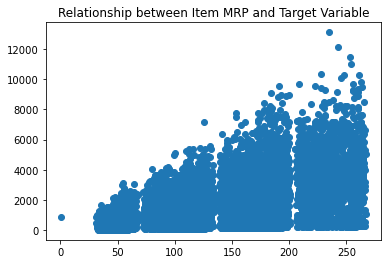

In [19]:
#Scatter plot(dot representation) to visualize the relationship between Item_MRP vs Target

plt.scatter(train.Item_MRP,train.Target)
plt.title("Relationship between Item MRP and Target Variable")

#plt.show()

In [20]:
#Unique values of column: Outlet_Establishment_Year

train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [21]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Target
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [22]:
#processing Outlet_Establishment_Year column by replacing it with number of years

train['Outlet_Age'] = 2021 - train['Outlet_Establishment_Year']
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Target,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34


Text(0.5, 1.0, 'Relationship between Outlet Age and Target Variable')

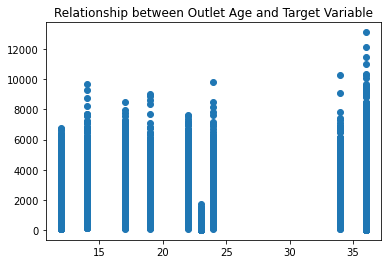

In [23]:
plt.scatter(train.Outlet_Age,train.Target)
plt.title("Relationship between Outlet Age and Target Variable")

#plt.show()

In [24]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', '  ', 'Small'], dtype=object)

In [27]:
#To Find The Null Values

train['Outlet_Size'].isnull().sum()  

2410

In [28]:
#count of each unique value in the column

train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [29]:
#count of each unique value in the column

train['Outlet_Size'].value_counts()

Medium    2793
Small     2387
High       932
             1
Name: Outlet_Size, dtype: int64

In [30]:
#Calculate the most repeated value within a column

train['Outlet_Size'].mode()

0    Medium
dtype: object

In [31]:
#type represents class or what form the output is in

type(train['Outlet_Size'].mode())

pandas.core.series.Series

In [32]:
#Calculate the most repeated value within a column. [0] represents index number

train['Outlet_Size'].mode()[0]

'Medium'

In [33]:
#to replace null or na or nan with 'Medium' for a specific column

train['Outlet_Size'] = train['Outlet_Size'].fillna('Medium')

In [36]:
train['Outlet_Size'].isnull

<bound method Series.isnull of 0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object>

In [37]:
# fill the na for outlet size with medium, here its replaced dynamically

train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [38]:
train['Outlet_Size']

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [39]:
train['Item_Weight'] 

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [40]:
# fill the na for item weight with the mean of weights

train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [41]:
train['Item_Weight'] 

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [42]:
#Check if still are there any null values present

train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Target                       0
Outlet_Age                   0
dtype: int64

<AxesSubplot:>

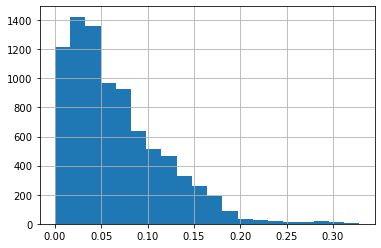

In [43]:
#Visualization of Item_Visibility using histogram, you can use any type of plot.
#It depends on which plot provides you better understanding
#bin size provide dispersion within the range

train['Item_Visibility'].hist(bins=20)

<AxesSubplot:>

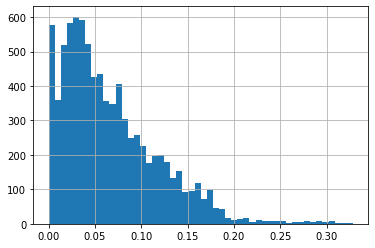

In [45]:
train['Item_Visibility'].hist(bins=50)

<AxesSubplot:>

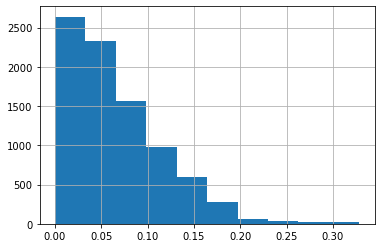

In [46]:
train['Item_Visibility'].hist(bins=10)

In [44]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Target,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34


# BOXPLOT

In [47]:
#Boxplot is used to remove outliers from the dataframe

Q1 = train['Item_Visibility'].quantile(0.25)
Q3 = train['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1



In [48]:
#Dataframe is filtered and assigned to new dataframe by providing the range
#here @Q1,@IQR,etc is replaced dynamically

filt_train = train.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')

In [49]:
print("min::",(Q1-(1.5*IQR)))
print("max::",(Q3+(1.5*IQR)))

min:: -0.07440424500000001
max:: 0.195979015


In [50]:
filt_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Target,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34


In [51]:
#dimensions of old and new dataframe

filt_train.shape, train.shape

((8379, 13), (8523, 13))

In [52]:
#overriding new dataframe to old dataframe

train = filt_train
train.shape

(8379, 13)

In [53]:
#Count of column unique values

train['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.061425      2
0.074779      2
0.073562      2
           ... 
0.146896      1
0.081119      1
0.122735      1
0.100641      1
0.027617      1
Name: Item_Visibility, Length: 7736, dtype: int64

In [54]:
#pd.cut is to assign labels to different range.

train['Item_Visibility_bins'] = pd.cut(train['Item_Visibility'], [0.00, 0.065, 0.13, 0.2], labels=['Low Viz', 'Viz', 'High Viz'])

In [55]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Target,Outlet_Age,Item_Visibility_bins
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22,Low Viz
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12,Low Viz
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22,Low Viz
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23,NaN
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34,NaN


In [56]:
train['Item_Visibility_bins'].mode()

0    Low Viz
Name: Item_Visibility_bins, dtype: category
Categories (3, object): ['Low Viz' < 'Viz' < 'High Viz']

In [57]:
train['Item_Visibility_bins'].isnull().sum()

526

In [58]:
#replacing specifically variable or value with some other string

train['Item_Visibility_bins'] = train['Item_Visibility_bins'].replace(NaN, 'Low Viz')

In [59]:
train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Target,Outlet_Age,Item_Visibility_bins
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,34,Low Viz
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,19,Low Viz
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,17,Low Viz
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,12,High Viz
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700,24,Low Viz


In [62]:
train['Item_Fat_Content']

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8379, dtype: object

In [60]:
#replacing specifically variable or value with some other string

train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')

In [61]:
train['Item_Fat_Content']

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8379, dtype: object

In [63]:
#replacing specifically variable or value with some other string

train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg', 'Regular')

In [64]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [65]:
#choosing the Fat content, item vizibility bins, outlet size, loc type and type for LABEL ENCODER

In [66]:
#Initialize the labelEncoder
le = LabelEncoder()

In [67]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Target,Outlet_Age,Item_Visibility_bins
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22,Low Viz
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12,Low Viz
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22,Low Viz
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23,NaN
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34,NaN


In [68]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [69]:
#converting categorical values to numerical

train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])

In [70]:
train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Target,Outlet_Age,Item_Visibility_bins
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,34,Low Viz
8519,FDS36,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,19,Low Viz
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,17,Low Viz
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,12,High Viz
8522,DRG01,14.800,0,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700,24,Low Viz


In [71]:
#converting categorical values to numerical

train['Item_Visibility_bins'] = le.fit_transform(train['Item_Visibility_bins'])

In [72]:
#converting categorical values to numerical

train['Outlet_Size'] = le.fit_transform(train['Outlet_Size'])

In [73]:
train['Outlet_Size']

0       2
1       2
2       2
3       2
4       1
       ..
8518    1
8519    2
8520    3
8521    2
8522    3
Name: Outlet_Size, Length: 8379, dtype: int32

In [74]:
#converting categorical values to numerical

train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])

In [75]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Target,Outlet_Age,Item_Visibility_bins
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,2,0,Supermarket Type1,3735.1380,22,1
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,2,2,Supermarket Type2,443.4228,12,1
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,2,0,Supermarket Type1,2097.2700,22,1
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,2,Grocery Store,732.3800,23,3
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,1,2,Supermarket Type1,994.7052,34,3


In [76]:
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [ ]:
# create dummies for outlet type

In [78]:
#One-hot encoding, creating unique row values as a column

dummy = pd.get_dummies(train['Outlet_Type'])
dummy.head(10)

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
5,0,0,1,0
6,0,1,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [79]:
#concatinating dataframes
#axis=1 is applying on column

train = pd.concat([train, dummy], axis=1)

In [82]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Target,Outlet_Age,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,2,0,Supermarket Type1,3735.1380,22,1,0,1,0,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,2,2,Supermarket Type2,443.4228,12,1,0,0,1,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,2,0,Supermarket Type1,2097.2700,22,1,0,1,0,0
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,2,Grocery Store,732.3800,23,3,1,0,0,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,1,2,Supermarket Type1,994.7052,34,3,0,1,0,0


In [83]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Target                       float64
Outlet_Age                     int64
Item_Visibility_bins           int32
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

In [84]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Target,Outlet_Age,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,2,0,Supermarket Type1,3735.1380,22,1,0,1,0,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,2,2,Supermarket Type2,443.4228,12,1,0,0,1,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,2,0,Supermarket Type1,2097.2700,22,1,0,1,0,0
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,2,Grocery Store,732.3800,23,3,1,0,0,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,1,2,Supermarket Type1,994.7052,34,3,0,1,0,0


In [85]:
# got to drop all the object types features, which are not important or unprocessed.

train = train.drop(['Item_Visibility','Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type','Outlet_Establishment_Year','Supermarket Type3'], axis=1)

In [87]:
train.head(5)

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Target,Outlet_Age,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2
0,9.30,0,249.8092,2,0,3735.1380,22,1,0,1,0
1,5.92,1,48.2692,2,2,443.4228,12,1,0,0,1
2,17.50,0,141.6180,2,0,2097.2700,22,1,0,1,0
3,19.20,1,182.0950,2,2,732.3800,23,3,1,0,0
4,8.93,0,53.8614,1,2,994.7052,34,3,0,1,0


In [88]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_MRP', 'Outlet_Size',
       'Outlet_Location_Type', 'Target', 'Outlet_Age', 'Item_Visibility_bins',
       'Grocery Store', 'Supermarket Type1', 'Supermarket Type2'],
      dtype='object')

In [89]:
train.head()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Target,Outlet_Age,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2
0,9.30,0,249.8092,2,0,3735.1380,22,1,0,1,0
1,5.92,1,48.2692,2,2,443.4228,12,1,0,0,1
2,17.50,0,141.6180,2,0,2097.2700,22,1,0,1,0
3,19.20,1,182.0950,2,2,732.3800,23,3,1,0,0
4,8.93,0,53.8614,1,2,994.7052,34,3,0,1,0


In [90]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_MRP', 'Outlet_Size',
       'Outlet_Location_Type', 'Target', 'Outlet_Age', 'Item_Visibility_bins',
       'Grocery Store', 'Supermarket Type1', 'Supermarket Type2'],
      dtype='object')

In [91]:
#Creating independent(X) and dependent(Y) variable

X = train.drop('Target', axis=1) #input columns
y = train.Target #target column

In [92]:
X

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Age,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2
0,9.300,0,249.8092,2,0,22,1,0,1,0
1,5.920,1,48.2692,2,2,12,1,0,0,1
2,17.500,0,141.6180,2,0,22,1,0,1,0
3,19.200,1,182.0950,2,2,23,3,1,0,0
4,8.930,0,53.8614,1,2,34,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,214.5218,1,2,34,1,0,1,0
8519,8.380,1,108.1570,2,1,19,1,0,1,0
8520,10.600,0,85.1224,3,1,17,1,0,1,0
8521,7.210,1,103.1332,2,2,12,0,0,0,1


In [94]:
y.head(5)

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Target, dtype: float64

In [ ]:
#Same processing for test data

In [95]:
test = pd.read_csv('Test_BigMart.csv')
test['Outlet_Size'] = test['Outlet_Size'].fillna('Medium')

In [96]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [97]:
test['Item_Visibility_bins'] = pd.cut(test['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels=['Low Viz', 'Viz', 'High Viz'])

In [99]:
test['Item_Visibility_bins'].head()

0    Low Viz
1    Low Viz
2        Viz
3    Low Viz
4        Viz
Name: Item_Visibility_bins, dtype: category
Categories (3, object): ['Low Viz' < 'Viz' < 'High Viz']

In [103]:
test['Item_Visibility_bins'].isnull().sum()

459

In [ ]:
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [100]:
test['Item_Weight'] 

0       20.750
1        8.300
2       14.600
3        7.315
4          NaN
         ...  
5676    10.500
5677     7.600
5678    10.000
5679    15.300
5680     9.500
Name: Item_Weight, Length: 5681, dtype: float64

In [104]:
test['Item_Visibility_bins'] = test['Item_Visibility_bins'].replace(NaN, 'Low Viz')
test['Item_Visibility_bins'].head()

0    Low Viz
1    Low Viz
2        Viz
3    Low Viz
4        Viz
Name: Item_Visibility_bins, dtype: category
Categories (3, object): ['Low Viz' < 'Viz' < 'High Viz']

In [105]:
test['Item_Visibility_bins'].isnull().sum()

459

In [106]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('reg', 'Regular')

In [107]:
test['Item_Fat_Content'] = le.fit_transform(test['Item_Fat_Content'])

In [108]:
test['Item_Visibility_bins'] = le.fit_transform(test['Item_Visibility_bins'])

In [109]:
test['Item_Visibility_bins']

0       1
1       1
2       2
3       1
4       2
       ..
5676    1
5677    0
5678    2
5679    3
5680    2
Name: Item_Visibility_bins, Length: 5681, dtype: int32

In [110]:
test['Outlet_Size'] = le.fit_transform(test['Outlet_Size'])

In [111]:
test['Outlet_Size']

0       1
1       1
2       1
3       1
4       1
       ..
5676    2
5677    1
5678    1
5679    1
5680    1
Name: Outlet_Size, Length: 5681, dtype: int32

In [112]:
test['Outlet_Location_Type']

0       Tier 1
1       Tier 2
2       Tier 3
3       Tier 2
4       Tier 3
         ...  
5676    Tier 1
5677    Tier 3
5678    Tier 2
5679    Tier 2
5680    Tier 2
Name: Outlet_Location_Type, Length: 5681, dtype: object

In [113]:
test['Outlet_Location_Type'] = le.fit_transform(test['Outlet_Location_Type'])

In [114]:
test['Outlet_Location_Type']

0       0
1       1
2       2
3       1
4       2
       ..
5676    0
5677    2
5678    1
5679    1
5680    1
Name: Outlet_Location_Type, Length: 5681, dtype: int32

In [115]:
test['Outlet_Age'] = 2021 - test['Outlet_Establishment_Year']

In [116]:
test['Outlet_Age']

0       22
1       14
2       23
3       14
4       36
        ..
5676    24
5677    12
5678    19
5679    14
5680    19
Name: Outlet_Age, Length: 5681, dtype: int64

In [117]:
dummy = pd.get_dummies(test['Outlet_Type'])
test = pd.concat([test, dummy], axis=1)

In [118]:
dummy

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
5676,0,1,0,0
5677,0,0,1,0
5678,0,1,0,0
5679,0,1,0,0


In [119]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Visibility_bins', 'Outlet_Age', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [120]:
X_test = test.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type','Outlet_Establishment_Year','Supermarket Type3','Item_Visibility'], axis=1)

In [121]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Visibility_bins', 'Outlet_Age', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [122]:
X.columns, X_test.columns

(Index(['Item_Weight', 'Item_Fat_Content', 'Item_MRP', 'Outlet_Size',
        'Outlet_Location_Type', 'Outlet_Age', 'Item_Visibility_bins',
        'Grocery Store', 'Supermarket Type1', 'Supermarket Type2'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Fat_Content', 'Item_MRP', 'Outlet_Size',
        'Outlet_Location_Type', 'Item_Visibility_bins', 'Outlet_Age',
        'Grocery Store', 'Supermarket Type1', 'Supermarket Type2'],
       dtype='object'))

In [123]:
X_test

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Visibility_bins,Outlet_Age,Grocery Store,Supermarket Type1,Supermarket Type2
0,20.750,0,107.8622,1,0,1,22,0,1,0
1,8.300,1,87.3198,1,1,1,14,0,1,0
2,14.600,0,241.7538,1,2,2,23,1,0,0
3,7.315,0,155.0340,1,1,1,14,0,1,0
4,NaN,1,234.2300,1,2,2,36,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5676,10.500,1,141.3154,2,0,1,24,0,1,0
5677,7.600,1,169.1448,1,2,0,12,0,0,1
5678,10.000,0,118.7440,1,1,2,19,0,1,0
5679,15.300,1,214.6218,1,1,3,14,0,1,0


In [124]:
#Random Splitting the data into training and testing
#test_size=0.3 --> test_data with 30% records and training with 70%
#Random_state is to hold same random records for trainind and testing, even if its executed multiple times
#value for Random_state can be any value. Just an Id


from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=124)

In [126]:
xtrain

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Age,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2
1441,12.857645,0,206.7954,3,0,36,1,1,0,0
525,16.350000,1,225.9062,3,0,24,1,0,1,0
329,13.350000,0,216.7166,2,1,19,1,0,1,0
4681,12.857645,0,244.3170,2,2,36,1,0,0,0
8516,18.600000,0,0.7588,2,2,12,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2927,12.857645,1,48.4692,2,2,36,1,0,0,0
691,16.350000,0,127.4020,2,1,19,1,0,1,0
8470,5.860000,1,155.1314,2,0,22,0,0,1,0
4841,13.850000,1,232.7300,2,2,12,1,0,0,1


In [127]:
xtest

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Age,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2
8062,12.300000,0,115.9834,2,0,22,1,0,1,0
7803,12.857645,0,254.7040,2,2,36,1,0,0,0
2660,12.857645,1,52.5640,2,2,36,0,0,0,0
7378,15.300000,1,215.7218,2,2,12,2,0,0,1
5479,13.000000,1,174.1054,2,1,14,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1649,17.700000,1,184.3924,3,0,24,3,0,1,0
5023,17.700000,1,103.3674,2,0,22,2,0,1,0
5412,19.350000,0,169.2474,2,1,14,1,0,1,0
2761,7.970000,0,108.4596,3,1,17,1,0,1,0


In [128]:
ytrain

1441     833.5816
525     5416.9488
329     3918.8988
4681    8262.5780
8516     858.8820
          ...    
2927    1034.6532
691      759.0120
8470    1551.3140
4841    6291.8100
4632    2554.0088
Name: Target, Length: 5865, dtype: float64

In [129]:
ytest

8062    2073.3012
7803    3036.0480
2660    2290.3520
7378    1923.4962
5479    4377.6350
          ...    
1649    4257.1252
5023    2546.6850
5412    3705.8428
2761    3020.0688
6211     539.2980
Name: Target, Length: 2514, dtype: float64

In [ ]:
# Algebric equations
# differentiation
# partial derivatives
# integration
# slope
# spacial distance, euclidean distance
# probability

# What is it? what is the significance? one example

Linear Algebric Equations:
y = mx + c

y = 2x + 1 --> Linear Equation..

Non-Linear Equations:
y**2 - 4 = 0
2*sqrt(x) - y = 6


Differentiation:

y = x**2

dy/dx = 2x = 0
x = 0

y = 4x**2 + 8x + 10
dy/dx = 8x + 8 = 0
x = -1

y = 4 + -8 + 10 = 6

x = -2
y = 16 - 16 + 10 = 10

Chain Rule:

f(x) = sin(3x**2 + x)
dy/dx = cos(3x**2 + x) * (6x + 1)


Q) ln(x**(-4) + x**4)

Partial derivatives:
f(x,y) = x**2 + y**2
dy/dx = 2x + 0

In [130]:
#Dimensions of each type after splitting

print (X.shape)
print (y.shape)
print (xtrain.shape)
print (xtest.shape)
print (ytrain.shape)
print (ytest.shape)

(8379, 10)
(8379,)
(5865, 10)
(2514, 10)
(5865,)
(2514,)


In [131]:
X.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_MRP', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Age', 'Item_Visibility_bins',
       'Grocery Store', 'Supermarket Type1', 'Supermarket Type2'],
      dtype='object')

# LINEAR REGRESSION MODEL PREDICTION

In [132]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression() #Initialize the algorithm

lin.fit(xtrain, ytrain)#xtrain --> is my input and ytrain --> is my output, 
#fit means understanding the relation between input and output

predictions = lin.predict(xtest)

In [133]:
predictions

array([1842.66863623, 5469.00833964, 2352.88655386, ..., 2711.55014602,
       1800.20077479,  737.06495926])

In [134]:
from sklearn.metrics import mean_squared_error
print("Average error of the model::",sqrt(mean_squared_error(ytest, predictions)))

Average error of the model:: 1124.5802702646192


In [135]:
#RMSE --> Root Mean Squared Error